# Ambil data

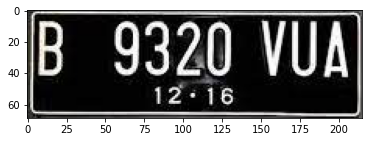

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("plat.jpg")
plt.imshow(im)

# Grayscaling and thresholding

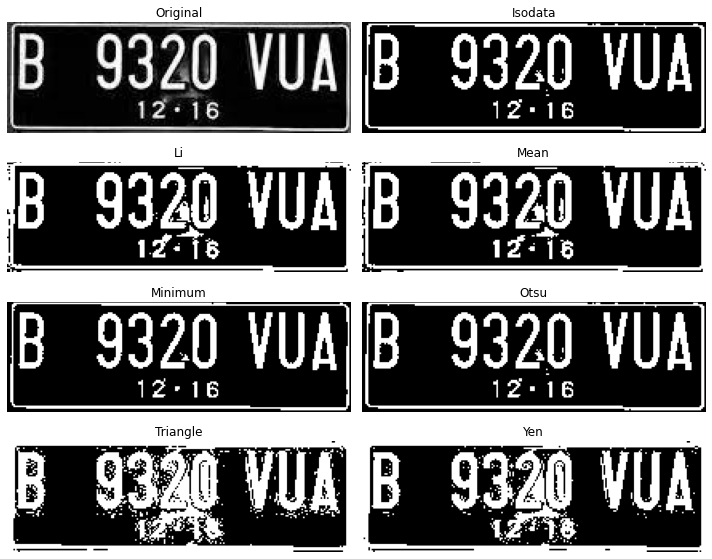

In [ ]:
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold

img = rgb2gray(im)
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

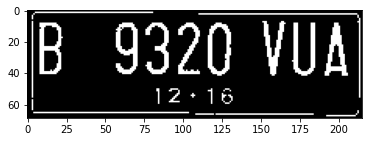

In [ ]:
from skimage.filters import threshold_minimum
import cv2
threshold = threshold_minimum(img)

imgt = (img > (threshold+0.3))*255
plt.imshow(imgt,cmap=plt.cm.gray)

# cropping

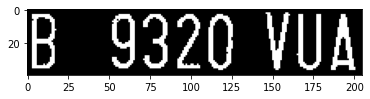

In [ ]:
# crop image[col,row]
imgts = imgt[5:45,5:210]
plt.imshow(imgts,cmap=plt.cm.gray)

# thinning

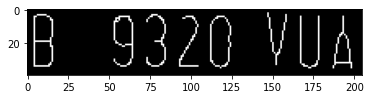

In [ ]:
thin = cv2.ximgproc.thinning(imgts.astype(np.uint8))
plt.imshow(thin,cmap=plt.cm.gray)

# Splitting

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False]
[ 1 35]


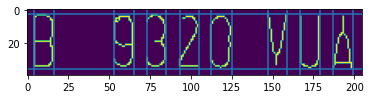

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_vertical_bbox(img):
  # vertical
  vertical_sum = np.sum(img, axis=0)
  vertical_sum = vertical_sum != 0
  # cari difference
  changes = np.logical_xor(vertical_sum[1:], vertical_sum[:-1])
  # hasil difference - cari indexnya
  change_pts = np.nonzero(changes)[0]
  return change_pts

def get_horizontal_bbox(img):
  # horizontal
  horizontal_sum = np.sum(img, axis=1)
  horizontal_sum = horizontal_sum != 0
  print(horizontal_sum)
  # cari difference
  changes = np.logical_xor(horizontal_sum[1:], horizontal_sum[:-1])
  # hasil difference - cari indexnya
  change_pts = np.nonzero(changes)[0]
  return change_pts

v_pts = get_vertical_bbox(thin)
h_pts = get_horizontal_bbox(thin)

print(h_pts)

plt.imshow(thin)
for change in v_pts:
    plt.axvline(change+1)
for change in h_pts:
    plt.axhline(change+1)
plt.show()

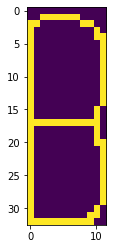

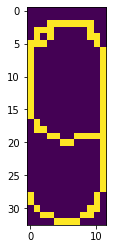

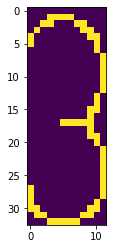

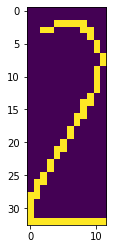

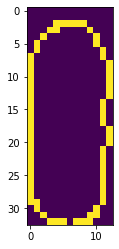

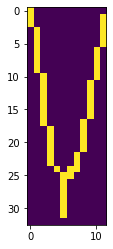

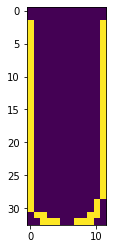

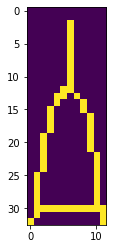

In [ ]:
# split image
# crop vertical
thinv = thin[h_pts[0]+1:h_pts[1],:]
# crop horizontal
all_img = []
for i in range(int(len(v_pts)/2)):
  plt.figure()
  im_s = thinv[:,v_pts[2*i]+1:v_pts[2*i+1]+1]
  all_img.append(im_s)
  plt.imshow(im_s)